# Offerzen Tech Stacks vs Company Size

> The purpose of this notebook is to be able to show the company size for any tech stack being offered in the offerzen public dataset.

## Installing Packages

First we need to install `pandas` on our docker instance.

In [1]:
import sys
!{sys.executable} -m pip install pandas matplotlib seaborn

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

%matplotlib inline

In [3]:
df = pd.read_json('offerzen_company_size.json')
df

company_size            name               tech
0            1-15          &Wider      .Net Core 2.0
1            1-15          &Wider            ASP.NET
2            1-15          &Wider                 C#
3            1-15          &Wider              HTML5
4            1-15          &Wider             MS SQL
5            1-15          &Wider    Microsoft Azure
6            1-15          &Wider            jQuery 
7            1-15          0xLabs      .Net Core 2.0
8            1-15          0xLabs         Bootstrap 
9            1-15          0xLabs              HTML5
10           1-15          0xLabs         Javascript
11           1-15          0xLabs             MS SQL
12           1-15          0xLabs    Microsoft Azure
13           1-15          0xLabs            Node.js
14           1-15          0xLabs              React
15           1-15          0xLabs               Sass
16           1-15          0xLabs         TypeScript
17         51-200          1-grid            ASP.NET
18         51-200          1-grid                PHP
19          15-50  101 Collective          AngularJS
20          15-50  101 Collective             Django
21          15-50  101 Collective              HTML5
22          15-50  101 Collective               Java
23          15-50  101 Collective         Javascript
24          15-50  101 Collective         PostgreSQL
25          15-50  101 Collective             Python
26          15-50  101 Collective              React
27          15-50  101 Collective              Redis
28          15-50  101 Collective               Sass
29          15-50  101 Collective         TypeScript
...           ...             ...                ...
9867      201-500           weFix             MS SQL
9868      201-500           weFix         PostgreSQL
9869      201-500           weFix             Python
9870      201-500           weFix              React
9871      201-500           weFix              Redis
9872       51-200         wiGroup         Amazon EC2
9873       51-200         wiGroup          Amazon S3
9874       51-200         wiGroup         Amazon VPC
9875       51-200         wiGroup               Java
9876       51-200         wiGroup            Laravel
9877       51-200         wiGroup              MySQL
9878       51-200         wiGroup                PHP
9879       51-200         wiGroup              Redis
9880       51-200         wiGroup   Spring Framework
9881       51-200         wiGroup              Swift
9882       51-200         wiGroup              nginx
9883         1-15    ydangle apps         Amazon EC2
9884         1-15    ydangle apps          Amazon S3
9885         1-15    ydangle apps                 C#
9886         1-15    ydangle apps  Google App Engine
9887         1-15    ydangle apps              HTML5
9888         1-15    ydangle apps               Java
9889         1-15    ydangle apps         Javascript
9890         1-15    ydangle apps              MySQL
9891         1-15    ydangle apps            Node.js
9892         1-15    ydangle apps        Objective-C
9893         1-15    ydangle apps                PHP
9894         1-15    ydangle apps              React
9895         1-15    ydangle apps              Swift
9896         1-15    ydangle apps            jQuery 

[9897 rows x 3 columns]

## List of Tech Stacks

This is a snippet that can be used to determine which tech stacks are available to use

In [4]:
df.tech.unique()

array(['.Net Core 2.0', 'ASP.NET', 'C#', 'HTML5', 'MS SQL',
       'Microsoft Azure', 'jQuery ', 'Bootstrap ', 'Javascript',
       'Node.js', 'React', 'Sass', 'TypeScript', 'PHP', 'AngularJS',
       'Django', 'Java', 'PostgreSQL', 'Python', 'Redis', 'nginx',
       'Google App Engine', 'Jasmine', 'MEAN Stack', 'MySQL',
       'TensorFlow', 'Amazon EC2', 'Amazon S3', 'MongoDB', 'Objective-C',
       'Swift', 'C', 'C++', 'Go', 'Ember.js', 'Heroku', 'Rails', 'Ruby',
       'Sidekiq', 'Xamarin', 'Laravel', 'Kotlin', 'unity', 'Amazon VPC',
       'RabbitMQ ', 'Apache Cordova', 'Backbone.js', 'Spring Framework',
       'Perl', 'StructureMap', 'CouchDB', 'Ionic', 'memcached', 'Meteor',
       'Groovy', 'Scala', 'Kibana', 'MATLAB', 'Vue.js', 'CasperJS',
       'Oracle', 'Cassandra', 'ExtJS', 'Clojure', 'Kafka', 'Play ', 'R',
       'Erlang', 'Elixir', 'Phalcon', 'Solidity', 'Aurelia'], dtype=object)

## Running the Visualization

After determining the tech stack that you would like to see, you run the below to visualize the output

> Try using different tech_stack values and see what gets generated.

In [5]:
technology = 'Java'

df_tech = df[df.tech == technology]
result = df_tech[['company_size','name']].groupby('company_size').count().reset_index()

result


company_size  name
0         1-15   105
1        1000+    24
2        15-50   106
3      201-500    16
4     501-1000    15
5       51-200    63

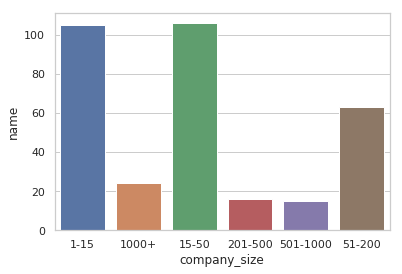

In [6]:
sns.set(style="whitegrid")
plot = sns.barplot(data = result, 
            x = 'company_size', 
            y = 'name')


## Improvements

Let's start to make improvements. We will go through them one by one. We will also use one block for each improvement because it is better to view the changes in the visualizes instead of the DataFrame objects

### Ordering the X-Axis
Here we reorder the data so that it makes sense on the X-Axis.

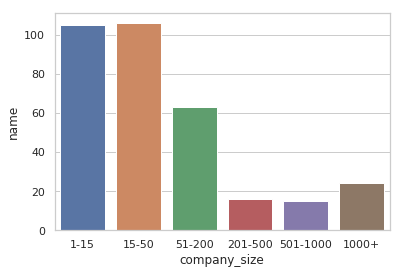

In [7]:
import re

technology = 'Java'

df_tech = df[df.tech == technology]
result = df_tech[['company_size','name']].groupby('company_size').count().reset_index()

# This 
result['sorted'] = result['company_size'].str.extract('(\d{0,})', expand = True).astype(int)
result = result.sort_values('sorted')
result

sns.set(style="whitegrid")
plot = sns.barplot(data = result, 
            x = 'company_size', 
            y = 'name')

### Changing the Color Scheme

Here we change the color scheme because we want to show that high and low values are not really important to us.

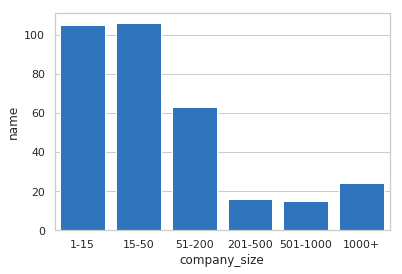

In [8]:
import re

technology = 'Java'

df_tech = df[df.tech == technology]
result = df_tech[['company_size','name']].groupby('company_size').count().reset_index()

# This 
result['sorted'] = result['company_size'].str.extract('(\d{0,})', expand = True).astype(int)
result = result.sort_values('sorted')
result

sns.set(style="whitegrid")
plot = sns.barplot(data = result, 
            x = 'company_size', 
            y = 'name',
            palette = sns.crayon_palette(["Navy Blue"]))

### Using Better Labels

Here we want to use better labels to communicate the intent 

Text(0, 0.5, 'Number of Companies')

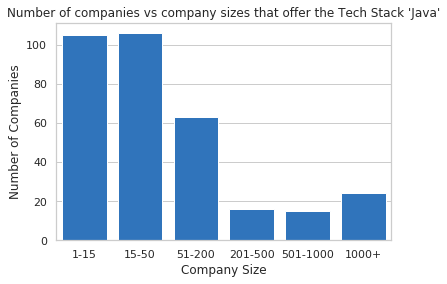

In [10]:
sns.set(style="whitegrid")
plot = sns.barplot(data = result, 
            x = 'company_size', 
            y = 'name',
           palette = sns.crayon_palette(["Navy Blue"]))

plot.set_title(f"Number of companies vs company sizes that offer the Tech Stack '{technology}'")
plot.set_xlabel("Company Size")
plot.set_ylabel("Number of Companies")